In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
df=pd.read_csv(r"D:\Data Science\Raw datasets\IRIS.csv")

In [31]:
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [32]:
df.shape

(150, 5)

In [33]:
df.duplicated().sum()

3

In [34]:
df=df.drop_duplicates()

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  147 non-null    float64
 1   sepal_width   147 non-null    float64
 2   petal_length  147 non-null    float64
 3   petal_width   147 non-null    float64
 4   species       147 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.9+ KB


In [36]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [37]:
df["species"].value_counts()

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: species, dtype: int64

In [38]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844
std,0.829100,0.437009,1.759111,0.757874
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


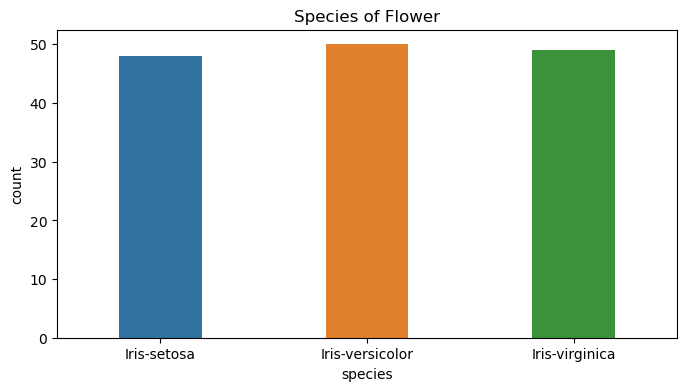

In [39]:
# DATA VISUALISATION
plt.figure(figsize=(8,4))
sns.countplot(x=df["species"],data=df,width=0.4)
plt.title("Species of Flower",fontsize=12)
plt.show()

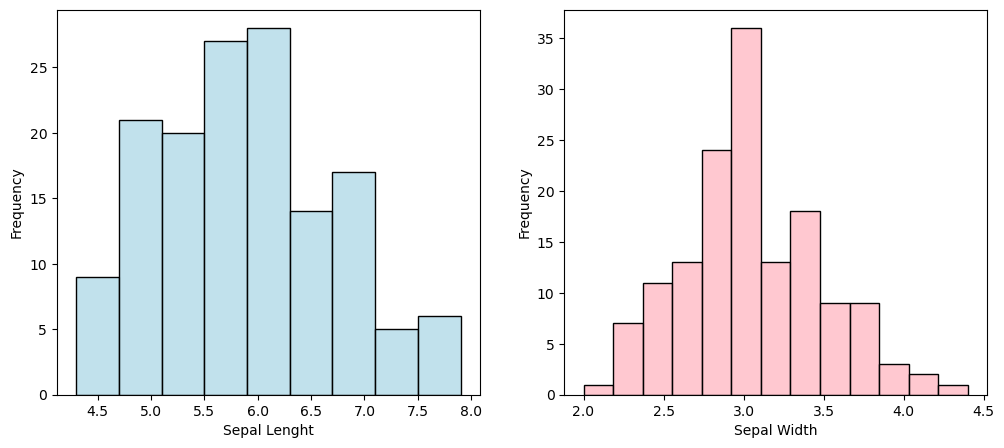

In [40]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(x=df["sepal_length"],data=df,color="lightblue")
plt.xlabel("Sepal Lenght")
plt.ylabel("Frequency")
plt.subplot(1,2,2)
sns.histplot(x=df["sepal_width"],data=df,color="lightpink")
plt.xlabel("Sepal Width")
plt.ylabel("Frequency")
plt.show()

plt.show()

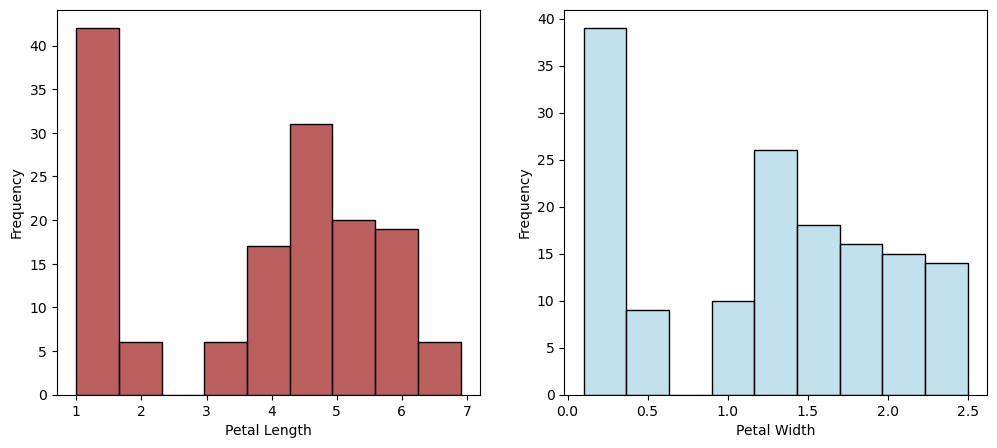

In [41]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(x=df["petal_length"],data=df,color="brown")
plt.xlabel("Petal Length")
plt.ylabel("Frequency")

plt.subplot(1,2,2)
sns.histplot(x=df["petal_width"],data=df,color="lightblue")
plt.xlabel("Petal Width")
plt.ylabel("Frequency")
plt.show()

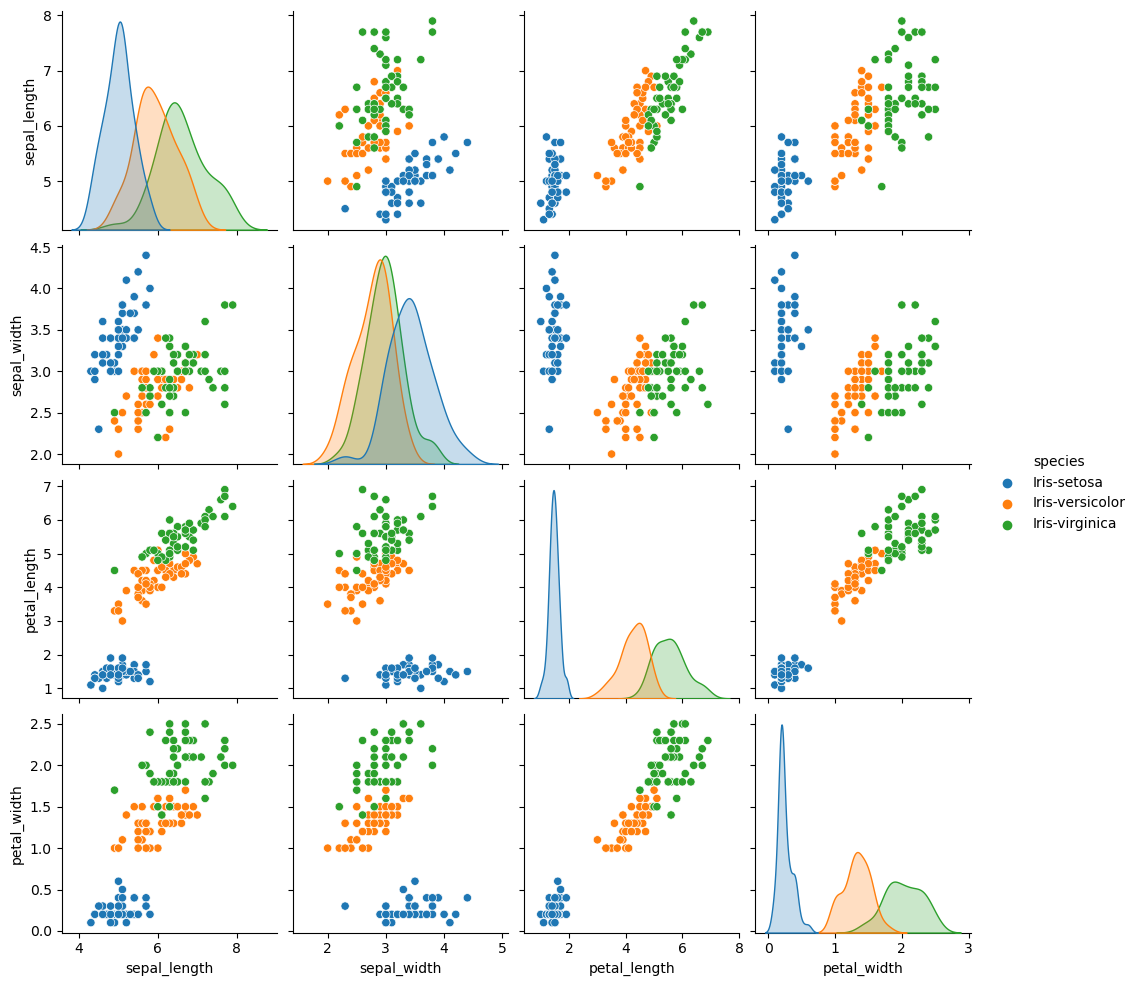

In [42]:
sns.pairplot(data=df,hue="species")
plt.show()

C:\Users\doshi\AppData\Local\Temp\ipykernel_24824\2894974921.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap="BrBG")


<Axes: >

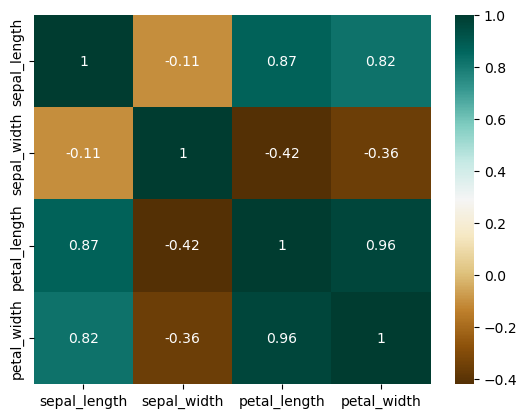

In [43]:
sns.heatmap(df.corr(),annot=True,cmap="BrBG")

In [44]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(df["species"])
df["species"]=le.transform(df["species"])

In [45]:
input_data=df.iloc[:,:-1]
output_data=df["species"]

In [47]:
input_data

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [48]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(input_data)
input_data=pd.DataFrame(ss.transform(input_data),columns=input_data.columns)

In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(input_data,output_data,random_state=42,test_size=0.20)

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,recall_score,precision_score,classification_report
from sklearn.model_selection import cross_val_score
lr=LogisticRegression()
lr.fit(x_train,y_train)
train=lr.score(x_train,y_train)*100
test=lr.score(x_test,y_test)*100
cv=cross_val_score(LogisticRegression(),input_data,output_data,cv=5)*100
print("---*---Logistic Regression Model---***----")
print("Training Accuracy ==>> ",train)
print("Testing Accuracy ==>> ",test)
print("Cross Validation Score ==>>",min(cv),"  & ",max(cv))
print("\n")
print(classification_report(y_test,lr.predict(x_test)))

---*---Logistic Regression Model---***----
Training Accuracy ==>>  97.43589743589743
Testing Accuracy ==>>  96.66666666666667
Cross Validation Score ==>> 89.65517241379311   &  100.0


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.90      0.95        10
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [51]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion="gini",splitter="best",max_depth=3)
dt.fit(x_train,y_train)
train=dt.score(x_train,y_train)*100
test=dt.score(x_test,y_test)*100
cv=cross_val_score(DecisionTreeClassifier(criterion="entropy",splitter="best"),input_data,output_data,cv=5)*100
print("---*---Decision Tree Classifier Model---***----")
print("Training Accuracy ==>> ",train)
print("Testing Accuracy ==>> ",test)
print("Cross Validation Score ==>>",min(cv),"  & ",max(cv))
print("\n")
print(classification_report(y_test,dt.predict(x_test)))

---*---Decision Tree Classifier Model---***----
Training Accuracy ==>>  96.58119658119658
Testing Accuracy ==>>  90.0
Cross Validation Score ==>> 86.20689655172413   &  100.0


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.82      0.90      0.86        10
           2       0.88      0.78      0.82         9

    accuracy                           0.90        30
   macro avg       0.90      0.89      0.89        30
weighted avg       0.90      0.90      0.90        30



In [52]:
from sklearn.ensemble import RandomForestClassifier
rfr=RandomForestClassifier(n_estimators=20,criterion="gini")
rfr.fit(x_train,y_train)
train=rfr.score(x_train,y_train)*100
test=rfr.score(x_test,y_test)*100
cv=cross_val_score(RandomForestClassifier(n_estimators=50,criterion="gini"),input_data,output_data,cv=5)*100
print("---*---Random Forest Classifier Model---***----")
print("Training Accuracy ==>> ",train)
print("Testing Accuracy ==>> ",test)
print("Cross Validation Score ==>>",min(cv),"  & ",max(cv))
print("\n")
print(classification_report(y_test,rfr.predict(x_test)))

---*---Random Forest Classifier Model---***----
Training Accuracy ==>>  100.0
Testing Accuracy ==>>  93.33333333333333
Cross Validation Score ==>> 89.65517241379311   &  100.0


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.90      0.90      0.90        10
           2       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [53]:
from sklearn.svm import SVC
svc=SVC(kernel="linear",degree=3,shrinking=False,verbose=True)
svc.fit(x_train,y_train)
train=svc.score(x_train,y_train)*100
test=svc.score(x_test,y_test)*100
cv=cross_val_score(SVC(kernel="linear"),input_data,output_data,cv=5)*100
print("------Support Vector Classifier Model---***----")
print("Training Accuracy ==>> ",train)
print("Testing Accuracy ==>> ",test)
print("Cross Validation Score ==>>",min(cv),"  & ",max(cv))
print("\n")
print(classification_report(y_test,svc.predict(x_test)))

[LibSVM]------Support Vector Classifier Model---***----
Training Accuracy ==>>  98.29059829059828
Testing Accuracy ==>>  96.66666666666667
Cross Validation Score ==>> 93.10344827586206   &  100.0


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.90      0.95        10
           2       0.90      1.00      0.95         9

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [60]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
train=knn.score(x_train,y_train)*100
test=knn.score(x_test,y_test)*100
cv=cross_val_score(KNeighborsClassifier(n_neighbors=5),input_data,output_data,cv=5)*100
print("---*---K Neighbour Model---***----")
print("Training Accuracy ==>> ",train)
print("Testing Accuracy ==>> ",test)
print("Cross Validation Score ==>>",min(cv),"  & ",max(cv))
print("\n")
print(classification_report(y_test,knn.predict(x_test)))

---*---K Neighbour Model---***----
Training Accuracy ==>>  96.58119658119658
Testing Accuracy ==>>  93.33333333333333
Cross Validation Score ==>> 93.10344827586206   &  100.0


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.90      0.90      0.90        10
           2       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



In [57]:
# PREDICTION
sepal_length=float(input("Enter Sepal Length: "))
sepal_width=float(input("Enter Sepal Width: "))
petal_length=float(input("Enter Petal Length: "))
petal_width=float(input("Enter Petal Width: "))
user_data=[sepal_length,sepal_width,petal_length,petal_width]
feature=le.fit_transform(user_data)
prediction=svc.predict([feature])
if prediction==0:
    print("After Analysing User Input Data we can classify flower species as Iris-setosa")
elif prediction==1:
    print("After Analysing User Input Data we can classify flower species as Iris-versicolor")
elif prediction==2:
    print("After Analysing User Input Data we can classify flower species as Iris-virginica")

Enter Sepal Length: 5.0
Enter Sepal Width: 3.6
Enter Petal Length: 1.4
Enter Petal Width: 0.2
After Analysing User Input Data we can classify flower species as Iris-versicolor


C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [58]:
output_df=pd.DataFrame({"Original Output":y_test,"Predicted Output":svc.predict(x_test)})
output_df

,Original Output,Predicted Output
127,2,2
53,1,1
140,2,2
19,0,0
106,2,2
12,0,0
78,1,1
31,0,0
83,1,2
9,0,0
